<a href="https://colab.research.google.com/github/nkarthikn95/EDA-Hotel-Bookings-Capstone-project1/blob/main/Copy_of_EDA_Hotel_booking_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

# When we hear about hotel booking we definitely hear about Make My Trip. Thanks to the large scale advertisement, I can't seem to get the ad out of my head. Needless to say, Make My trip was the main platform I used for my hotel booking. The main few things I will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we ae able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).

# This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children and babies, and the number of available parking spaces, among other things. All personally identifying information has been from the data.

#We will perform exploratory data analysis with python to get insight from the data.


#Import Packages

Lets import dataset and packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data
file_path = '/content/drive/MyDrive/EDA Capstone Project/Hotel Bookings (1).csv'
cp_df=pd.read_csv(file_path)

In [ ]:
#check the columns
cp_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Data at glance
cp_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
cp_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Checking the shape (rows and column numbers)
cp_df.shape

(119390, 32)

In [ ]:
# Looking for data information
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Checking the statistics of the data
cp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# Making the copy of original data
df=cp_df.copy()


In [ ]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df[col].unique())}')

Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']


In [ ]:
# Cleaning the Data 
#Checking the shape of duplicate data

df[df.duplicated()].shape 

(31994, 32)

In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
# Cheking the new shape of the data
df.shape

(87396, 32)

In [ ]:
# Finding null values
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# Handling Missing data

missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


0.004% of rows have missing data in children column. Now we will look at the distribution of this missing data.

In [ ]:
df['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

Most booking had no children and hence we will fill the missing rows for the children with 0



In [ ]:
df['children'].fillna(0,inplace=True)

In [ ]:
# Lets add some new columns

df['total_people'] = df['adults'] + df['babies'] + df['children']   
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']   

0.5% of rows have missing data in country column. Now we will look at the distribution of this missing information.

In [ ]:
country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
country_data.columns = ['Count', '% Distribution']
country_data

,Count,% Distribution
PRT,27453.0,31.412193
GBR,10433.0,11.937617
FRA,8837.0,10.111447
ESP,7252.0,8.297863
DEU,5387.0,6.163898
...,...,...
MMR,1.0,0.001144
BFA,1.0,0.001144
CYM,1.0,0.001144
MLI,1.0,0.001144


# As country,agent and company has null values,so we are replacing their name.

In [ ]:
df['country'].fillna('others',inplace=True)

In [ ]:
df['agent'].fillna('self_booked',inplace=True)
df ['company'].fillna('self_booked',inplace=True)

# Let's confirm all missing data have been handled

In [ ]:
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


# Exploratory Data Analysis 

#1. Which hotel is prefered by the guest?
Let’s answer our first question, how many bookings were made for each type of hotel.



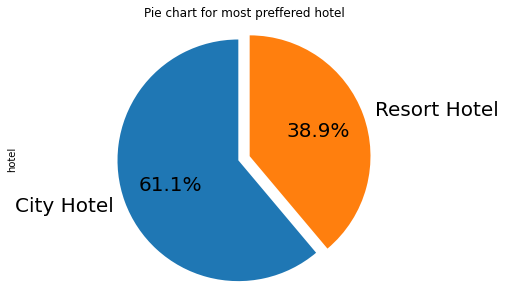

In [ ]:
df['hotel'].value_counts().plot.pie(explode=(0.1,0.0), startangle=90, autopct='%1.1f%%',figsize=(8,5),fontsize=20)

plt.axis('equal')
plt.title ('Pie chart for most preffered hotel')
plt.show()

# What do we see here?

*It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.

*Also, resort hotels tend to be appropriate for larger group of people. Let's have an overview of the number of people who booked the hotel.

#2. Best time of each year for the hotels where maximum bookings takes place

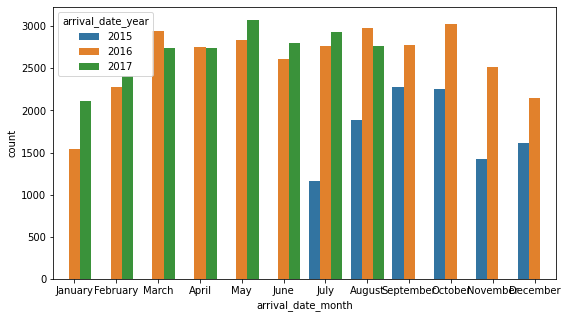

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data= df[df['is_canceled']==0],
              x = 'arrival_date_month',
              hue = 'arrival_date_year',
            
              order= ['January','February','March','April','May','June','July','August','September','October','November','December']);

#Inference

*Booking data is available from July 2015 to August 2017

*From the chart it is clearly evident that the bookings have increased in 
2016 compared to 2015 and in 2017 it has almost maintained the same number of bookings as in 2016

*Considering the bookings year wise we can conclude that the month of May has the highest booking in 2017 similarly in 2015 the months of September & October has the highest booking and in 2016 the months of October & March has the highest booking.



#3. From which country the hotels gets the maximum bookings 

In [ ]:
country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
country_data.columns = ['Count', '% Distribution']
country_data

,Count,% Distribution
PRT,27453.0,31.412193
GBR,10433.0,11.937617
FRA,8837.0,10.111447
ESP,7252.0,8.297863
DEU,5387.0,6.163898
...,...,...
MMR,1.0,0.001144
BFA,1.0,0.001144
CYM,1.0,0.001144
MLI,1.0,0.001144


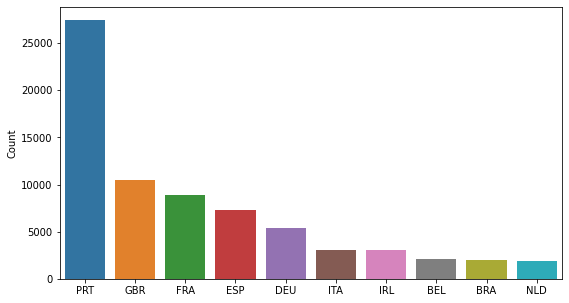

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=country_data[:10],
            x= country_data[:10].index,
            y='Count'
            );

Here we can observed that the country 'PRT' (Portugal) gives us the maximum bookings.

#4. Which Distribution channel is mostly used for hotel booking?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

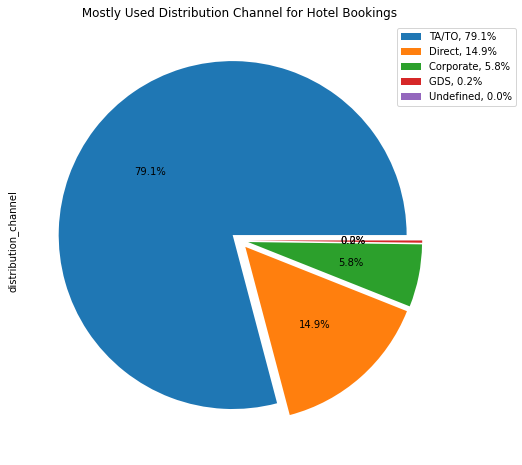

In [ ]:
# Visualizsing the by pie chart.

labels=df['distribution_channel'].value_counts().index.tolist()

distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

sizes=distribution_channel_df['percentage'].values.tolist()
df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.1f%%', shadow=False, figsize=(15,8),fontsize=10,labels=None)   

labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

Here we observed 'TA/TO' is mostly used for booking hotels.

#5. Most demanded meal type by most customer of hotel booking

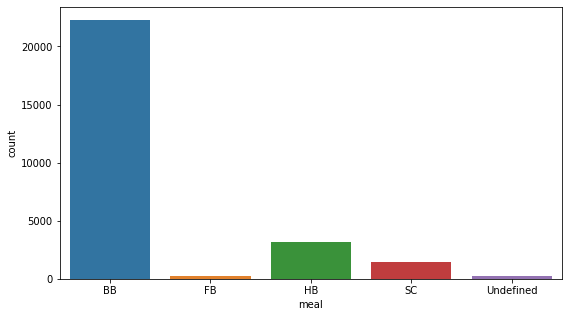

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data=df[df['country']=='PRT'],
              x='meal');

From the above chart it seems BB (Bed and Breakfast) is the preffered meal type.

#6. Customer type and their contribution to the bookings?

In [ ]:
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

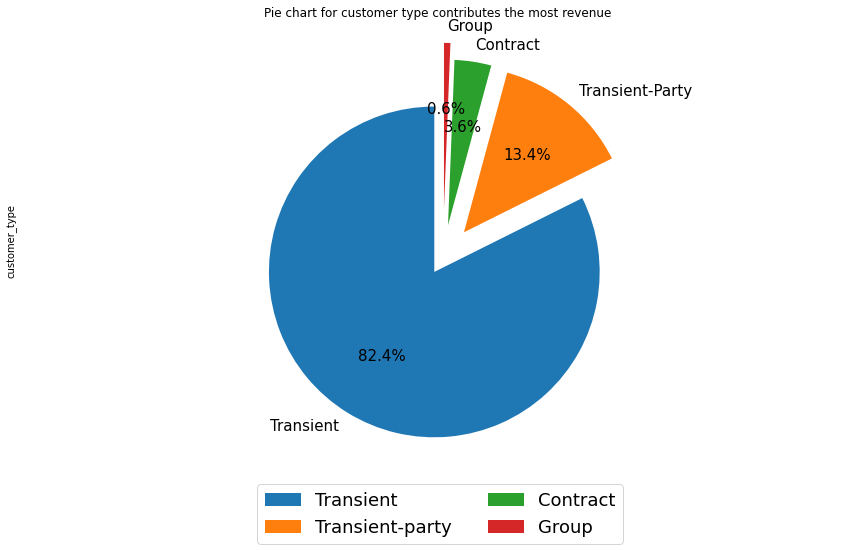

In [ ]:
df['customer_type'].value_counts().plot.pie(explode=(0.1,0.2,0.2,0.3), startangle=90, autopct='%1.1f%%',figsize=(15,8),fontsize=15 )

plt.axis('equal')
plt.title ('Pie chart for customer type contributes the most revenue ')

plt.legend(labels=['Transient','Transient-party','Contract','Group'], fontsize=18, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.show()

Customer type 'Transient' contributes the maximum bookings.

#Also hotel wise contribution by customer type.

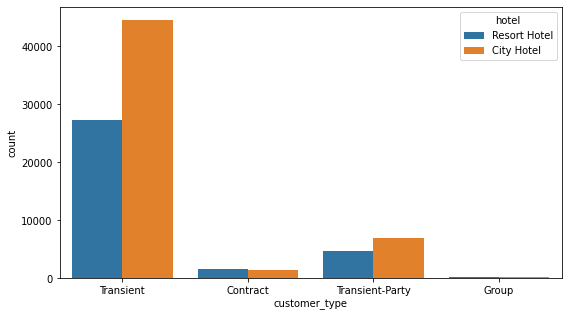

In [ ]:
plt.figure(figsize =(9,5))
sns.countplot(data=df,
              x='customer_type',
              hue='hotel');

Customer type 'Transient' contributes the maximum bookings.

#7. What are the major reasons that a customer cancel his booking?

#Exploring the reason of the cancellation:
#1. Booking changes
#2. Days in waiting list
#3. Whether the guest is repeated or the first timer

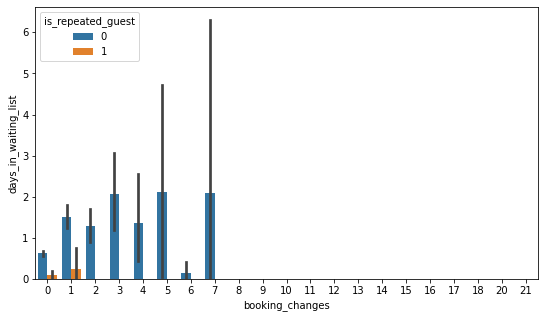

In [ ]:
plt.figure(figsize= (9,5))
sns.barplot(data= df,
            x= 'booking_changes',
            y = 'days_in_waiting_list',
            hue = 'is_repeated_guest');

#What is the pecentage of booking cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

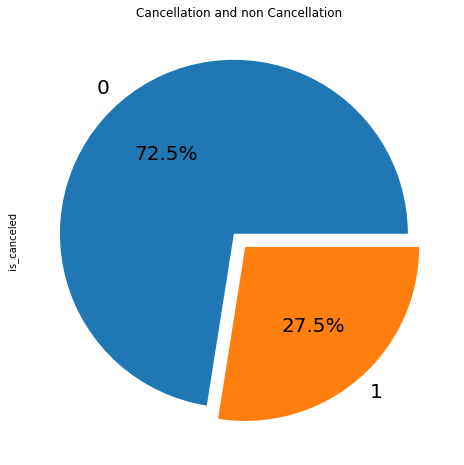

In [ ]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

###As we can see from the above chart
### 0= not cancled
### 1= canceled

### 27.5 % of the bookings were cancelled.

#8. Which agent gives us the maximum booking?

In [ ]:

highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
8,9.0,28759
173,240.0,13028
333,self_booked,12193
13,14.0,3349
6,7.0,3300
182,250.0,2779
174,241.0,1644
26,28.0,1502
7,8.0,1383
0,1.0,1232


Text(0.5, 1.0, 'Most Bookings Made by the agent')

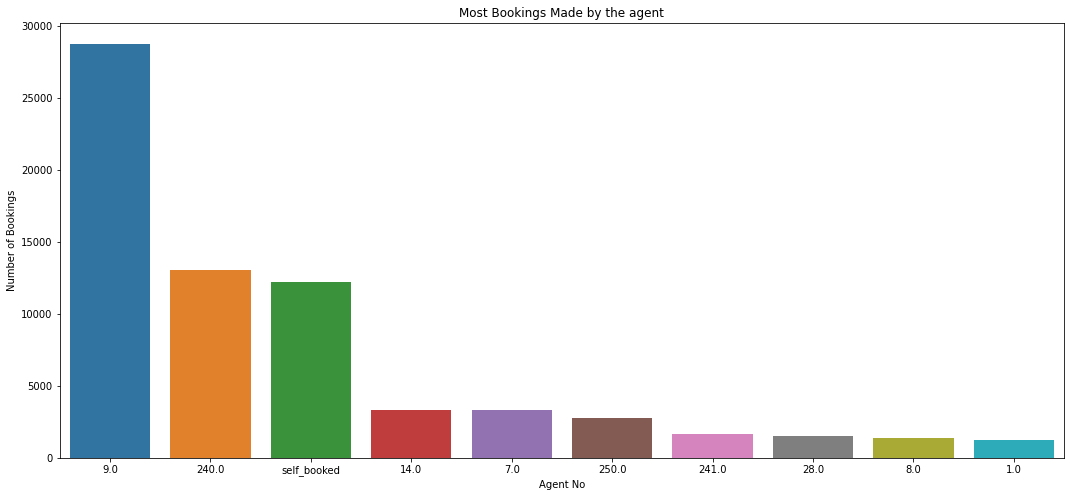

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


As we can see from the above data Agent ID '9' gives us the maximum bookings.This is with respect to agent.

#9. Which company gives us the maximum booking?

In [ ]:
# return highest bookings made by company
highest_bookings= df.groupby(['company'])['company'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as company 0 was self_booked value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['company']==0].index,inplace=True) 

# taking top 10 bookings made by company
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,company,Most_Bookings
352,self_booked,82137
20,40.0,851
131,223.0,503
23,45.0,238
92,153.0,206
93,154.0,133
127,219.0,131
102,174.0,121
170,281.0,119
138,233.0,95


Text(0.5, 1.0, 'Most Bookings Made by the company')

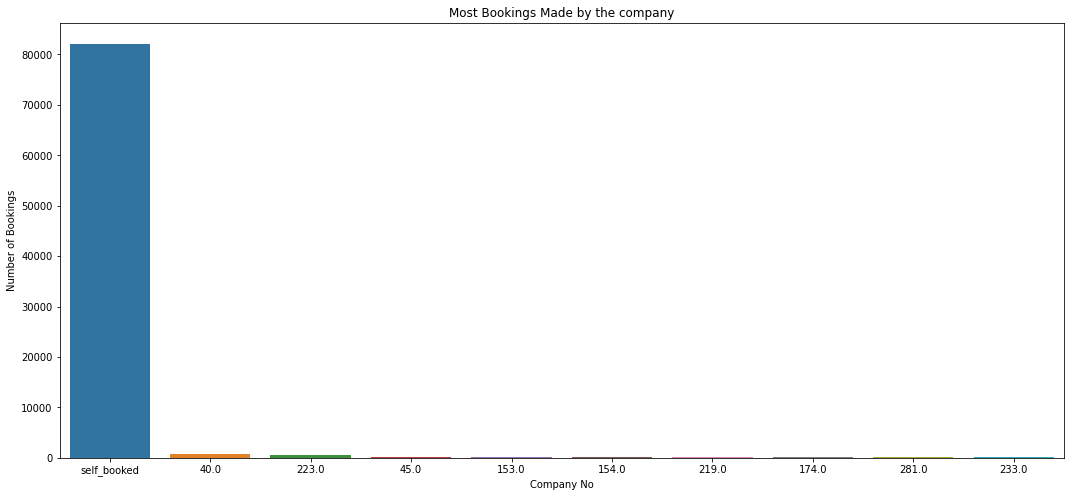

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['company'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['company'])
plt.xlabel('Company No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the company")


As we can see from the above data Company ID 'Self_booked' gives us the maximum bookings.This is with respect to Company.

#10. Which customer type contributes the most revenue?

---



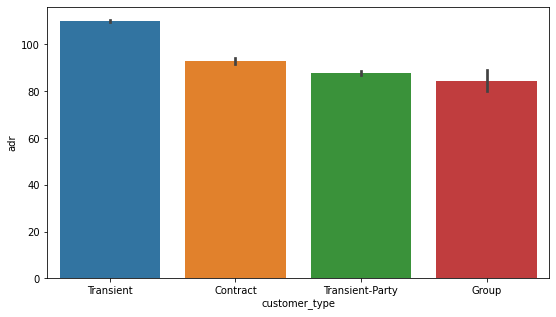

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=df,
            x='customer_type',
            y='adr');

From the above graph it shows 'Transient' customer_type contributes the most revenue.

#11. What is the percentage distribution of required_car_parking_spaces?

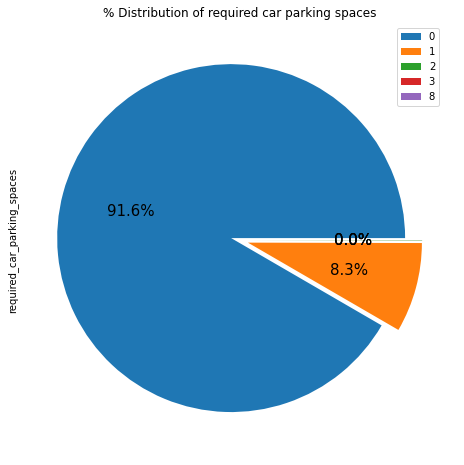

In [ ]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


### 91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

# 12.What is the Optimal stay length in both types of hotels ?

In [ ]:
stay = df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns


Text(0.5, 0, 'total_stay(days)')

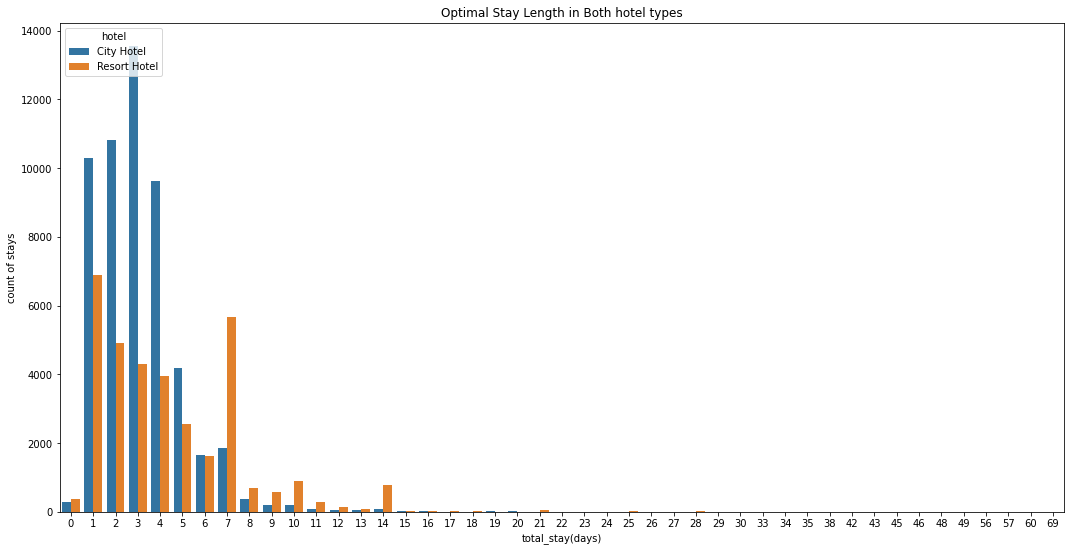

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')


Optimal stay in both the type hotel is less than 7 days

#13. ADR relationship with total number of people

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ADR v/s Total Number of people')

<Figure size 1224x576 with 0 Axes>

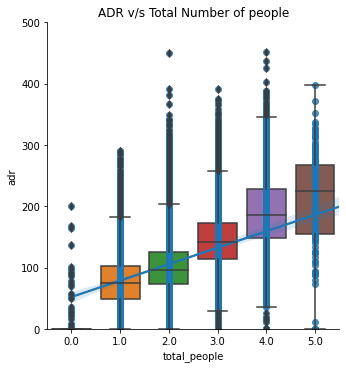

In [ ]:
plt.figure(figsize=(17,8))
df1=df[df['total_people'] < 6]
a_plot = sns. lmplot('total_people','adr', df)
a_plot. set(xlim=(0, 50))
a_plot. set(ylim=(0, 500))



sns.boxplot(x=df1['total_people'],y=df1['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

###As the  total number of people increases adr also increases.
###Thus adr and total people are directly proportional to each other.

#14. ADR across different  market segment


Text(0.5, 1.0, 'Adr across market segment')

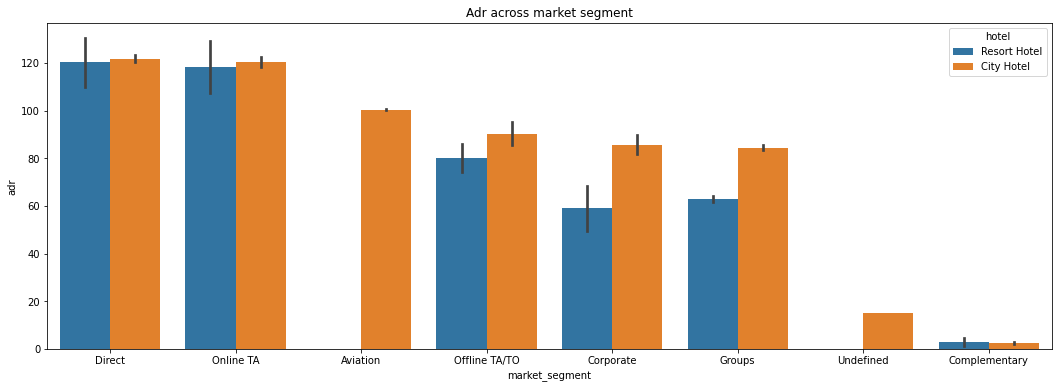

In [ ]:
Grupby=df.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')


### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'City Hotel'


#15. Lets plot the heatmap and see the co-relation 

Text(0.5, 1.0, 'Co-relation of the columns')

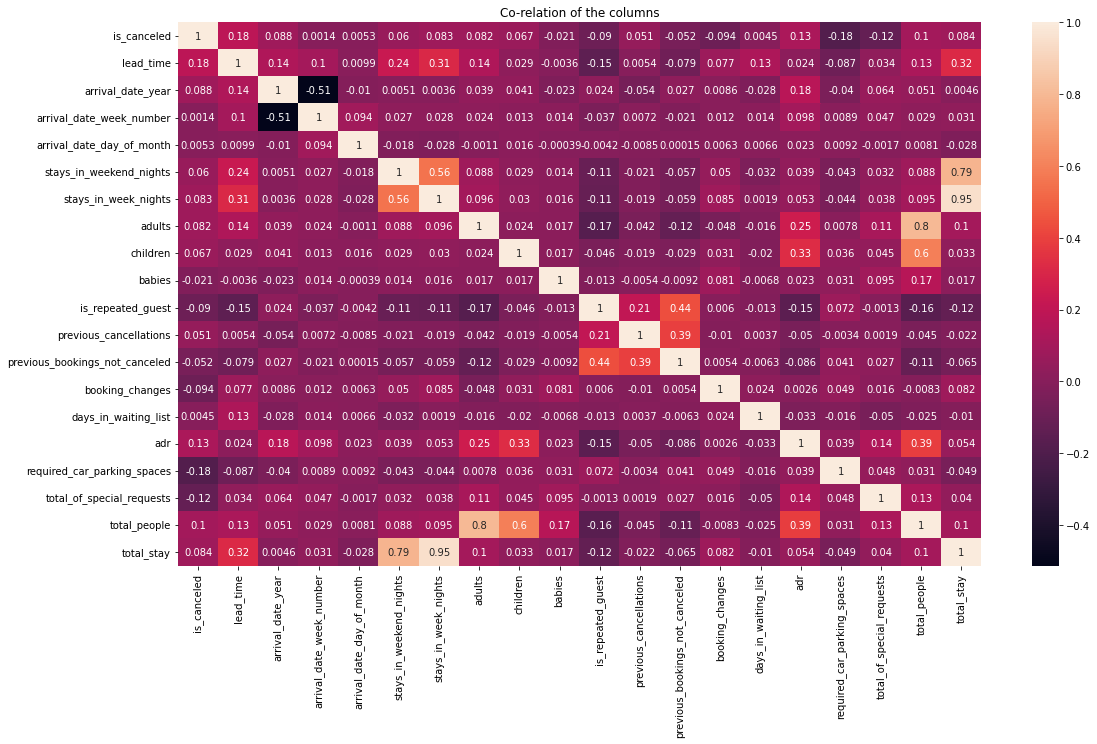

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

## ***Conclusions:***

1.	City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2. Best time of each year for the hotels where maximum bookings takes place are:

  2015-September and October

  2016- October and March

  2017- May
3.	Maximum number of guests were from Portugal, i.e. more than 25000 guests.
4.	79.1 % bookings were made through TA/TO (travel agents/Tour operators).
5.	BB( Bed & Breakfast) is the most preferred  type of meal by the guests.
6. Customer type 'Transient' contribuites the maximum booking with the percentage of 82.4 
7. 27.5 % bookings were got cancelled out of all the bookings.
8. Agent ID '9' gives us the maximum booking i.e.28759 
9. Company ID 'Self_booked' gives us the maximum booking i.e. 82137 
10. 
11.	Most of the customers (91.6%) do not require car parking spaces.
12. Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
13. 
14. In Market Segment the	Average ADR for city hotel is high as compared to resort hotels These City hotels are generating more revenue than the resort hotel.
15. Co-relation across the different column

